In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import PercentFormatter as pf

In [2]:
with open(r"C:\srimnotes\50nm.txt") as file:
    a = file.read().splitlines()

In [10]:
deg=np.empty((10,10000))

x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    y = 0
    for num in ar:
        deg[y,x] = num
        y=y+1
    x=x+1
    
print(deg[2,1000])

192.0


C:\Users\etcha\AppData\Local\Temp\ipykernel_17908\2300958868.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  ar = np.fromstring(line, dtype=float, sep="\t")


In [11]:
coefs=np.empty(10)

x=0
for col in deg:
    coefs[x]=math.sin(math.pi*col[0]/180)
    x+=1
print(deg[9])

[89.  32.8 74.7 ...  0.   0.   0. ]


In [12]:
bigArray=[]
dweights=[]

x=0
for col in deg:
    bigArray=np.append(bigArray,col[1:])
    dumb=np.empty(9999)
    y=0
    for num in col[1:]:
        dumb[y]=coefs[x]
        y+=1
    dweights=np.append(dweights,dumb)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
np.where(bigArray==0)[0]

array([], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

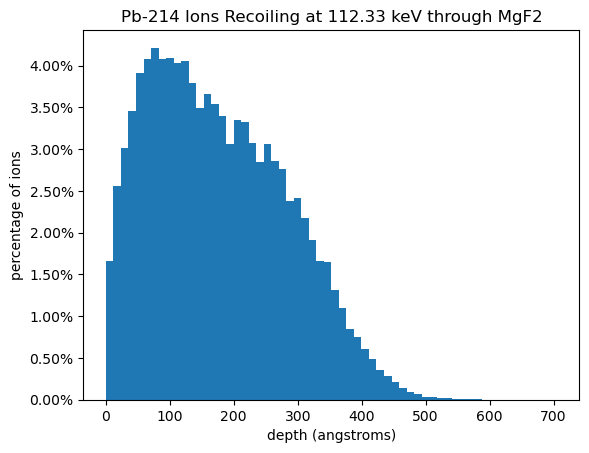

In [13]:
max1=np.amax(bigArray)
n = sum(dweights)
histo3=plt.hist(bigArray, bins=60, weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Pb-214 Ions Recoiling at 112.33 keV through MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

In [14]:
igls=[0.003805,0.030269,0.059618,0.087156,0.112045,0.133530,0.150958,0.163799,0.171663,0.069703]
bigArray2=[]
iweights=[]

x=0
for col in deg:
    bigArray2=np.append(bigArray2,col[1:])
    dumb=np.empty(9999)
    y=0
    for num in col[1:]:
        dumb[y]=igls[x]
        y+=1
    iweights=np.append(iweights,dumb)
    x+=1
    
zeros=np.where(bigArray2==0)[0]

bigArray2=np.delete(bigArray2,zeros)
iweights=np.delete(iweights,zeros)

<function matplotlib.pyplot.show(close=None, block=None)>

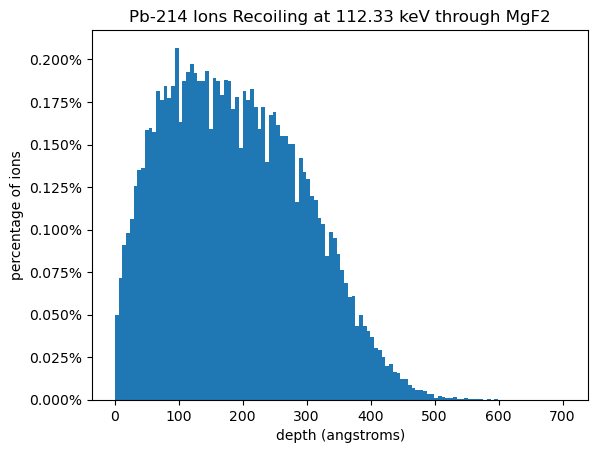

In [24]:
n=bigArray2.size
histo4=plt.hist(bigArray2, bins=120, weights=iweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Pb-214 Ions Recoiling at 112.33 keV through MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

In [28]:
histo4

(array([4.98087998e-04, 7.14919392e-04, 9.08683858e-04, 9.79868648e-04,
        1.06247289e-03, 1.25852709e-03, 1.34803207e-03, 1.36253887e-03,
        1.58512799e-03, 1.59932259e-03, 1.57198241e-03, 1.81251773e-03,
        1.76023895e-03, 1.84396616e-03, 1.77088421e-03, 1.84504084e-03,
        2.06890245e-03, 1.63443365e-03, 1.87302893e-03, 1.92757111e-03,
        1.97360674e-03, 1.92163455e-03, 1.87621827e-03, 1.87595697e-03,
        1.93029790e-03, 1.59066725e-03, 1.89295345e-03, 1.87281960e-03,
        1.78927276e-03, 1.88024509e-03, 1.87374392e-03, 1.70797890e-03,
        1.77899228e-03, 1.47878131e-03, 1.81327901e-03, 1.75945120e-03,
        1.82804670e-03, 1.71960644e-03, 1.58851164e-03, 1.71974592e-03,
        1.39751946e-03, 1.67283457e-03, 1.69400914e-03, 1.61467874e-03,
        1.55079111e-03, 1.54740692e-03, 1.50317385e-03, 1.50575459e-03,
        1.16213981e-03, 1.42205367e-03, 1.33900192e-03, 1.29899734e-03,
        1.19748279e-03, 1.17669893e-03, 1.07068862e-03, 1.030713

<function matplotlib.pyplot.show(close=None, block=None)>

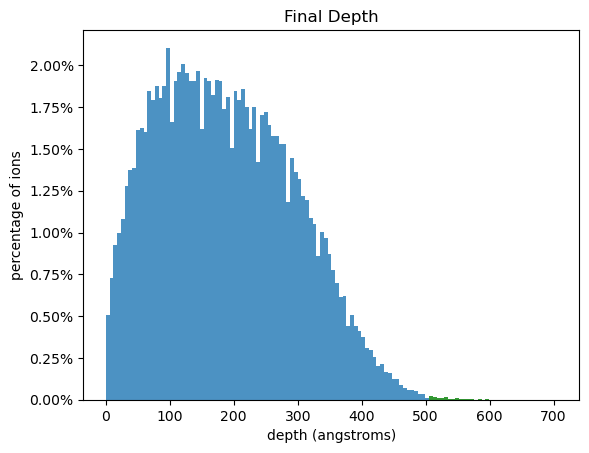

In [29]:
n=bigArray2.size
s=sum(iweights)
fig, ax = plt.subplots()
N, bins, patches=ax.hist(bigArray2, bins=120, weights=iweights/(s), alpha=.8)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Final Depth")
plt.gca().yaxis.set_major_formatter(pf(1))
for i in range(0,len(patches)):
    if histo[1][i] > 500:
       patches[i].set_facecolor('g')
plt.show

In [32]:
al=0
x=0
for bar in histo4[1]:
    if bar > 500:
        al += histo4[0][x]
        x+=1
        
al = al/s
print("{}% of ions end in the LXe!".format(al*100))

0.0005776948730284067% of ions end in the LXe!
